In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import os

os.chdir("/Users/jakeblumengarten/git_repository/nfl_analysis")

In [2]:

# Load play-by-play data for 2020
pbp_py = nfl.import_pbp_data([2024])
pbp_py.to_csv("2024.csv", index=False)

# Filter for games where Chicago is the home team
season24 = pd.read_csv('2024.csv', low_memory = False)
chicago = season24.query("posteam == 'CHI'")

# Select only the columns you want
chicago_games = chicago[["week", "yards_gained"]]

# Save to CSV
chicago_games.to_csv("chicago_yards_by_week.csv", index=False)

2024 done.
Downcasting floats.


## Yards By Week

In [ ]:

## Aggregate for the total yards for each game
chicago_agg = chicago_games.groupby("week", as_index = False).agg(
        total_yards_gained = ("yards_gained", "sum")
)

weeks = chicago_agg["week"]
yardspg = chicago_agg["total_yards_gained"]
winperc = [(1/1), (1/2), (1/3), (2/4), (3/5), (4/6), (4/7), (4/8), (4/9), (4/10), (4/11), (4/12), (4/13), (4/14), (4/15), (4/16), (5/17)]
chicago_agg['win_percentage'] = winperc
print(chicago_agg.head())

   week  total_yards_gained  win_percentage
0     1               150.0        1.000000
1     2               205.0        0.500000
2     3               395.0        0.333333
3     4               264.0        0.500000
4     5               424.0        0.600000


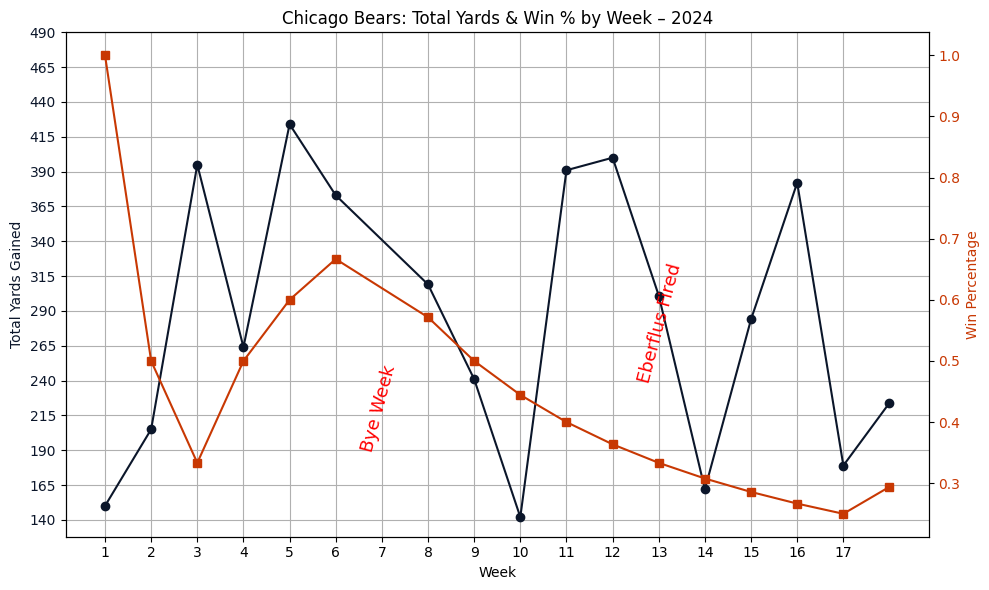

In [31]:

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total yards on primary Y-axis
ax1.plot(weeks, yardspg, color='#0B162A', marker='o', label='Total Yards')
ax1.set_xlabel("Week")
ax1.set_ylabel("Total Yards Gained", color='#0B162A')
ax1.tick_params(axis='y', labelcolor='#0B162A')
ax1.grid(True)
ax1.set_xticks(range(1,18))
ax1.set_yticks(range(140, 500, 25))

# Create secondary Y-axis
ax2 = ax1.twinx()
ax2.plot(weeks, winperc, color='#C83803', marker='s', label='Win %')
ax2.set_ylabel("Win Percentage", color='#C83803')
ax2.tick_params(axis='y', labelcolor='#C83803')

# Title and layout
plt.title("Chicago Bears: Total Yards & Win % by Week – 2024")
fig.tight_layout()
plt.savefig("chicago_yards_winpct_by_week.png")
ax1.text(x=6.5, y=190, s="Bye Week", fontsize=13, color='red', rotation = 75)
ax1.text(x=12.5, y= 240, s="Eberflus Fired", fontsize = 13, color = 'red', rotation = 75)
plt.show()



## 